    Материалы:
    1) https://portal.tpu.ru/SHARED/a/ARISTOVAEV/Student/Tab1/Lab%2011_Econ_mod.pdf
    2) https://mse.msu.ru/wp-content/uploads/2021/03/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85-%D1%80%D1%8F%D0%B4%D0%BE%D0%B2-1.pdf
    3) https://drive.google.com/file/d/1bK7HDs7hzwoZxBqpgR6Fo3cuebnBsxMb/view?usp=sharing
    4) https://www.hse.ru/data/2010/10/07/1224433083/%D0%9D%D0%BE%D1%81%D0%BA%D0%BE%20%D0%92.%D0%9F.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2,%202002.pdf
#    

Авторегрессионная модель

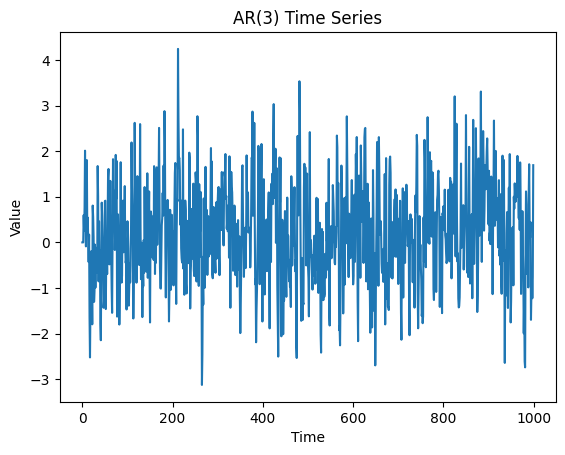

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем коэффициенты модели
a0 = 0.1
a1 = 0.5
a2 = -0.2
a3 = 0.1

# Генерируем временной ряд AR(3)
np.random.seed(42)
n = 1000
x = np.zeros(n)

for t in range(3, n):
    x[t] = a0 + a1*x[t-1] + a2*x[t-2] + a3*x[t-3] + np.random.normal()

plt.plot(x)
plt.title('AR(3) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Построение графиков ACF и PACF

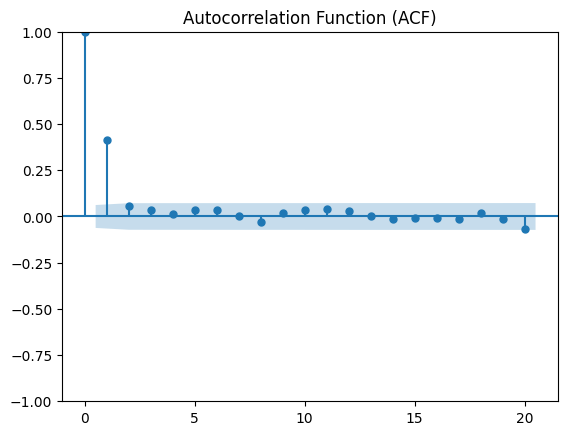

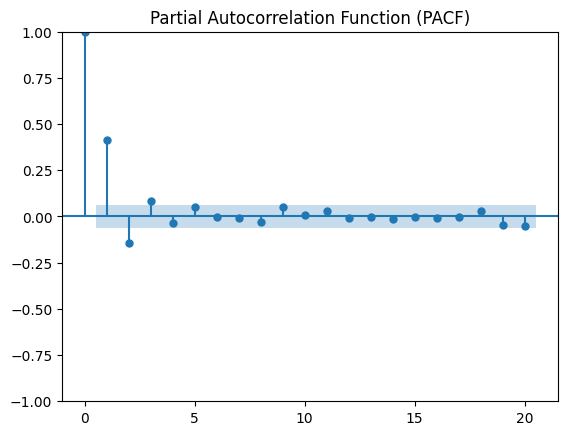

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# График автокорреляции (ACF)
plot_acf(x, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# График частичной автокорреляции (PACF)
plot_pacf(x, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Проверка стационарности с использованием теста Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Тест Дики-Фуллера
result = adfuller(x)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Проверка на стационарность (если p-value меньше уровня значимости, то ряд стационарен)
if result[1] <= 0.05:
    print('Ряд стационарен.')
else:
    print('Ряд нестационарен.')


ADF Statistic: -15.295552062566694
p-value: 4.383420687353554e-28
Critical Values: {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}
Ряд стационарен.


Анализ корней характеристического уравнения

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import I
from sympy import symbols

# Определение переменных
a, x = symbols('a x')

# Задаем коэффициенты модели AR(3)
a0 = 0.5
a1 = 0.3
a2 = -0.2
a3 = 0.1

# Характеристическое уравнение AR(3)
char_eq = Eq(1 - a1*x - a2*x**2 - a3*x**3, 0)

# Решение характеристического уравнения
roots = solve(char_eq, x)
print('Корни характеристического уравнения:', roots)

Корни характеристического уравнения: [2.44542835430245, -0.222714177151224 - 2.00989092308944*I, -0.222714177151224 + 2.00989092308944*I]


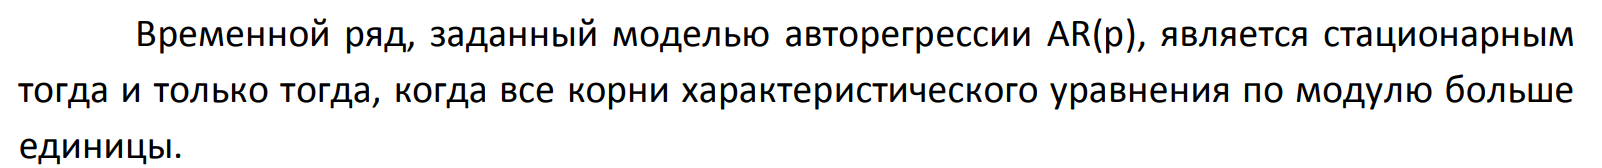

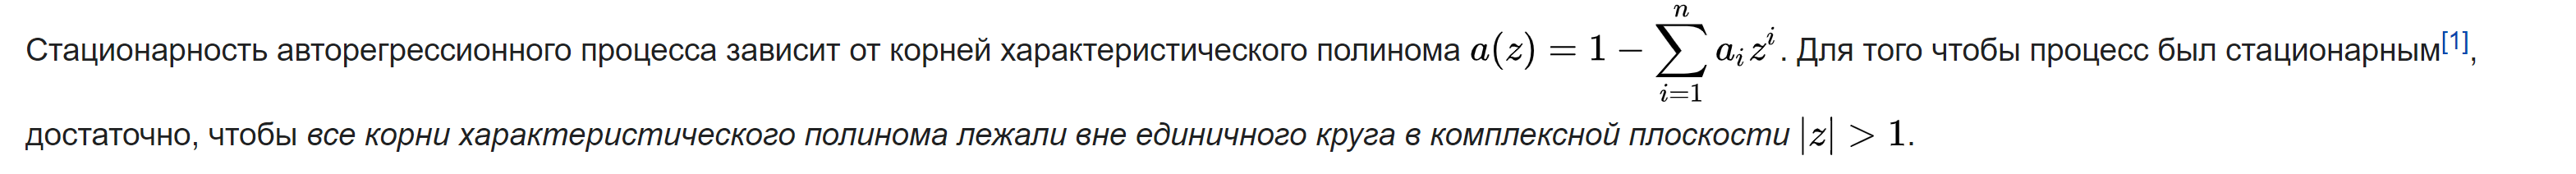

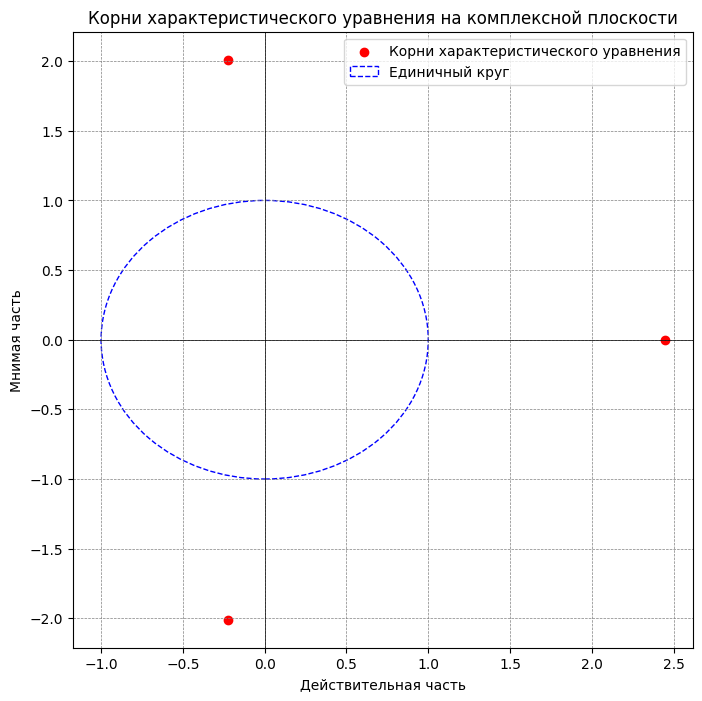

In [ ]:
# Извлечение действительных и мнимых частей корней
roots_real = [float(root.as_real_imag()[0]) for root in roots]
roots_imag = [float(root.as_real_imag()[1]) for root in roots]

plt.figure(figsize=(8, 8))
plt.scatter(roots_real, roots_imag, color='red', label='Корни характеристического уравнения')

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dashed', label='Единичный круг')
plt.gca().add_patch(circle)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Корни характеристического уравнения на комплексной плоскости')
plt.xlabel('Действительная часть')
plt.ylabel('Мнимая часть')
plt.legend()
plt.show()

Генерация данных

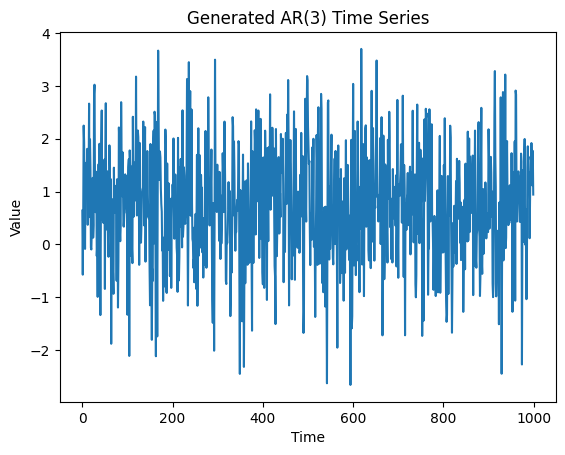

In [ ]:
initial_values = np.random.normal(size=3)

generated_data = np.zeros(n)
generated_data[:3] = initial_values

for t in range(3, n):
    generated_data[t] = a0 + a1*generated_data[t-1] + a2*generated_data[t-2] + a3*generated_data[t-3] + np.random.normal()

plt.plot(generated_data)
plt.title('Generated AR(3) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Преобразование временного ряда к последовательности векторов задержек

In [ ]:
def create_lagged_matrix(data, lag):
    n = len(data)
    lagged_matrix = np.zeros((n - lag, lag))

    for i in range(lag, n):
        lagged_matrix[i - lag, :] = data[i - lag:i]

    return lagged_matrix

# Задаем параметр задержки
lag = 3

# Преобразование временного ряда к последовательности векторов задержек
lagged_matrix = create_lagged_matrix(generated_data, lag)

Обучение машины опорных векторов (SVR) для задачи регрессии

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(lagged_matrix, generated_data[lag:], test_size=0.2, random_state=42)

# Обучение SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
ar_coefficients = svr_model.coef_[0]
print('Авторегрессионные коэффициенты:', ar_coefficients)

Mean Squared Error: 1.2346900879279072
Авторегрессионные коэффициенты: [ 0.13472876 -0.15861774  0.21323142]


Построение продолжения временного ряда и сравнение графиков

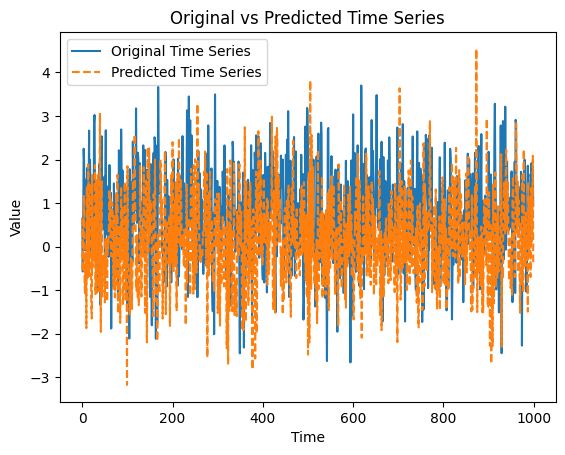

In [ ]:
predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

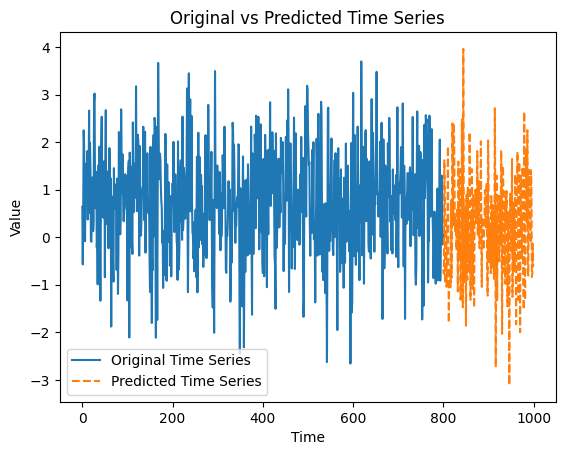

In [ ]:
# вариант с добавлением только предсказанного конца
predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data[:800], label='Original Time Series')
plt.plot(np.arange(800, 1000), predicted_values[800:], label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Анализ работы при различных ядрах и гиперпараметрах модели

Работаем с ядром linear

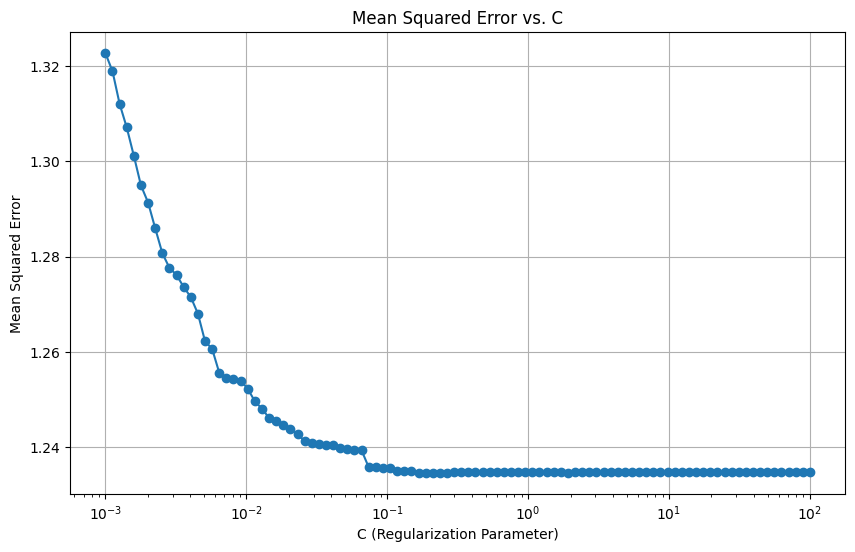

In [ ]:
# C (параметр регуляризации): Параметр, который контролирует компромисс между подгонкой данных и общей сложностью модели.
#Большие значения C могут привести к более точной подгонке данных, но могут также привести к переобучению.
C_values = np.logspace(-3, 2, 100)

mse_values = []

for C in C_values:
    svr_model_rbf = SVR(kernel='linear', C=C, gamma='scale')
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. C')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

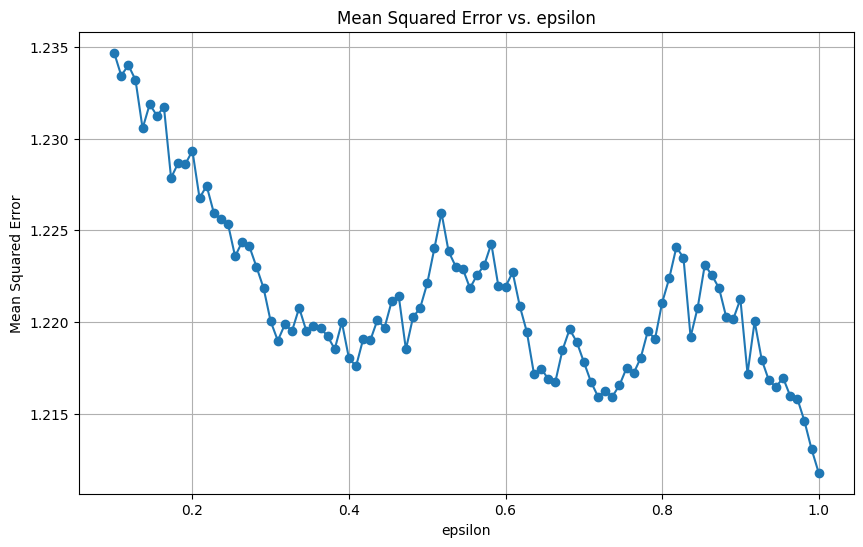

In [ ]:
epsilon_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for epsilon_value in epsilon_values:
    svr_model_linear = SVR(kernel='linear', epsilon=epsilon_value)
    svr_model_linear.fit(X_train, y_train)
    y_pred_linear = svr_model_linear.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_linear)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. epsilon')
plt.xlabel('epsilon')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

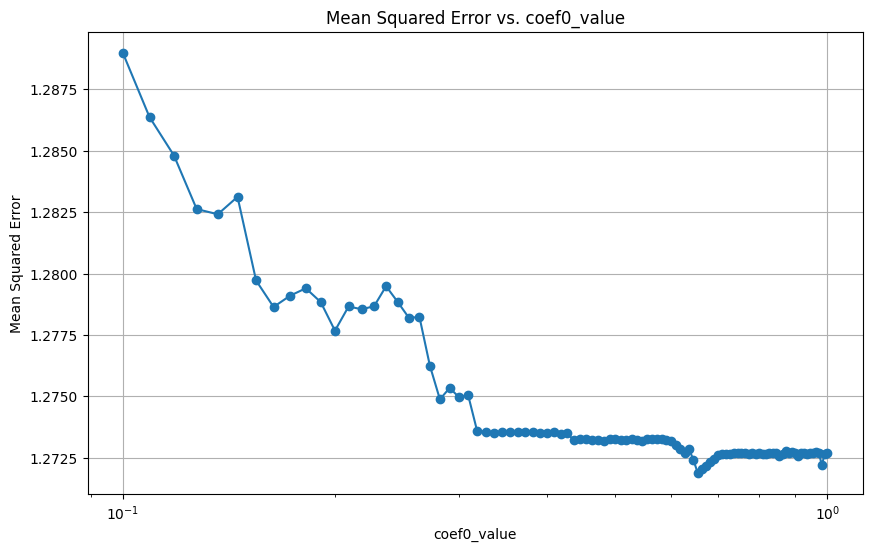

In [ ]:
# coef0 (свободный член): Свободный член в функции ядра, который влияет на взаимодействие между константой и коэффициентом ядра.

coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_rbf = SVR(kernel='poly', C=1.0, coef0=coef0_value)
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Работаем с ядром rbf

Mean Squared Error (RBF Kernel): 1.278220963525532


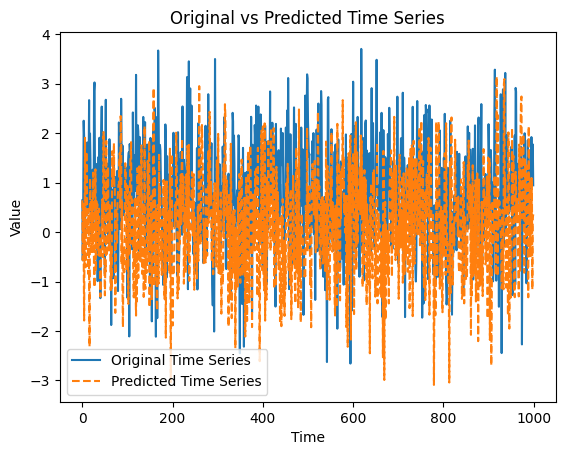

In [ ]:
svr_model_rbf = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model_rbf.fit(X_train, y_train)
y_pred_rbf = svr_model_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print('Mean Squared Error (RBF Kernel):', mse_rbf)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

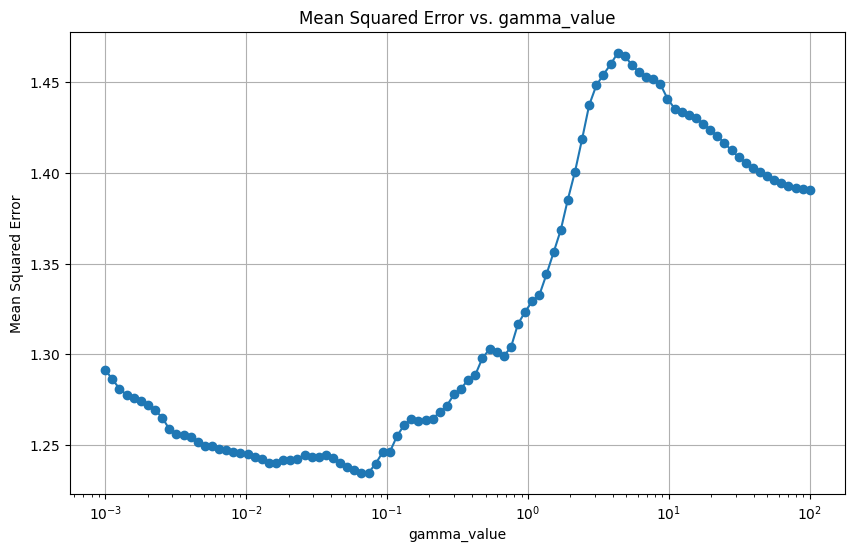

In [ ]:
#gamma (коэффициент ядра): Коэффициент, используемый в некоторых ядрах, таких как радиально-базисное.
#Он влияет на форму кривой и контролирует, насколько далеко влияют отдельные обучающие точки.

gamma_values = np.logspace(-3, 2, 100)

mse_values = []

for gamma_value in gamma_values:
    svr_model_rbf = SVR(kernel='rbf', C=1.0, gamma=gamma_value)
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. gamma_value')
plt.xlabel('gamma_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

Работаем с ядром poly

Mean Squared Error (RBF Kernel): 1.3122675600355083


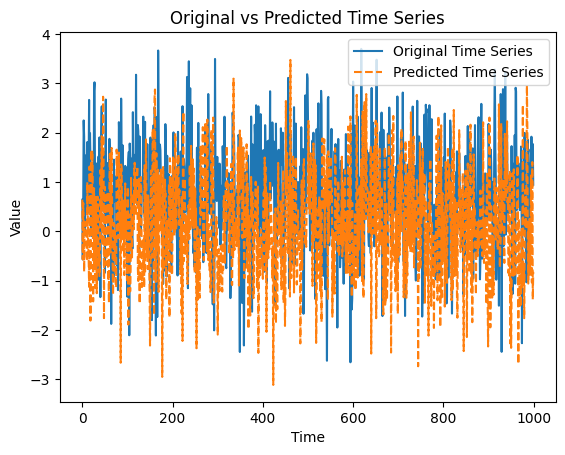

In [ ]:
svr_model_rbf = SVR(kernel='poly', C=1.0, gamma='scale')
svr_model_rbf.fit(X_train, y_train)
y_pred_rbf = svr_model_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print('Mean Squared Error (RBF Kernel):', mse_rbf)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

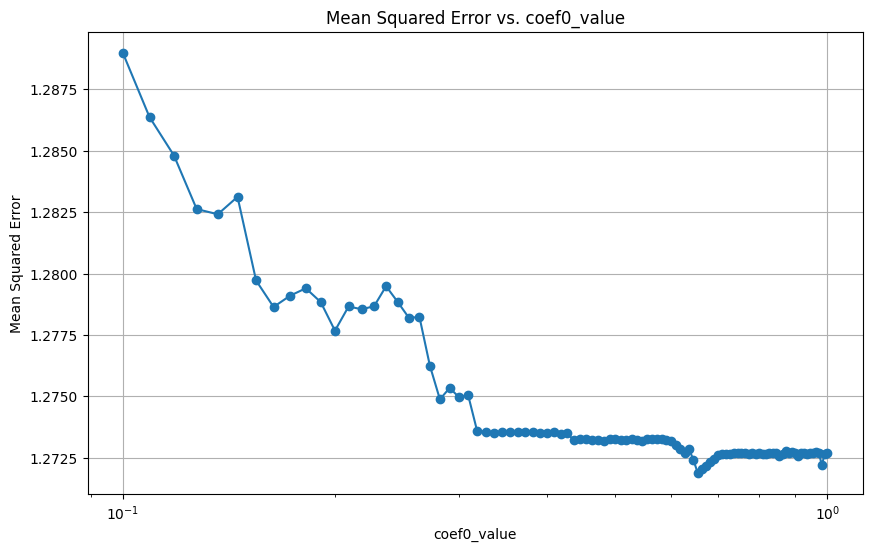

In [ ]:
# coef0 (свободный член): Свободный член в функции ядра, который влияет на взаимодействие между константой и коэффициентом ядра.

coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_rbf = SVR(kernel='poly', C=1.0, coef0=coef0_value)
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

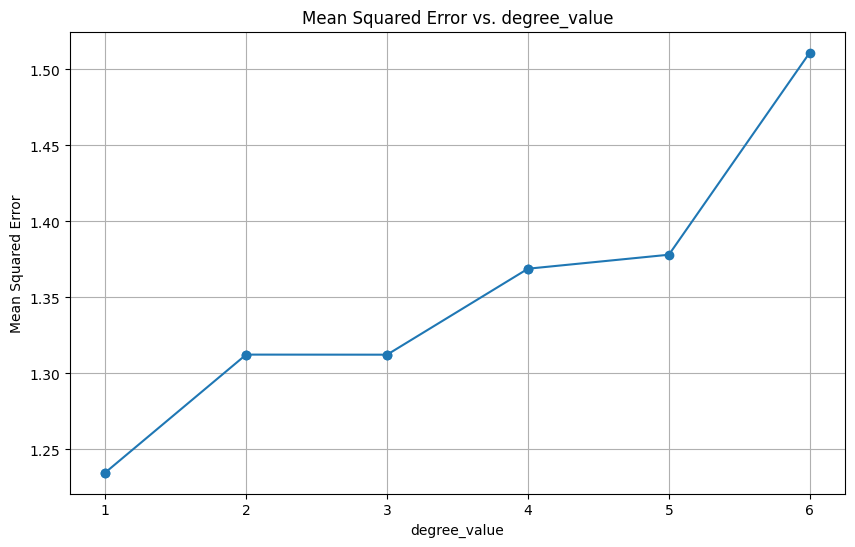

In [ ]:
#degree (степень для полиномиального ядра): Применяется только для полиномиального ядра и определяет степень полинома.

degree_values = np.linspace(1, 6, 10, dtype=int)

mse_values = []

for degree_value in degree_values:
    svr_model_poly = SVR(kernel='poly', C=1.0, degree=degree_value)
    svr_model_poly.fit(X_train, y_train)
    y_pred_poly = svr_model_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_poly)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degree_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. degree_value')
plt.xlabel('degree_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


Работаем с ядром sigmoid

Mean Squared Error (sigmoid Kernel): 998.8917067593071


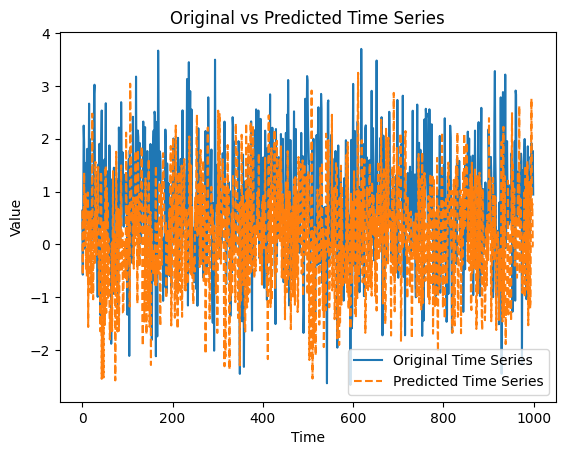

In [ ]:
svr_model_rbf = SVR(kernel='sigmoid', C=1.0, gamma='scale')
svr_model_rbf.fit(X_train, y_train)
y_pred_rbf = svr_model_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print('Mean Squared Error (sigmoid Kernel):', mse_rbf)

predicted_values = np.zeros(n)
predicted_values[:lag] = generated_data[:lag]

for t in range(lag, n):
    predicted_values[t] = ar_coefficients[0] + np.dot(ar_coefficients, predicted_values[t-lag:t][::-1]) + np.random.normal()

plt.plot(generated_data, label='Original Time Series')
plt.plot(predicted_values, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

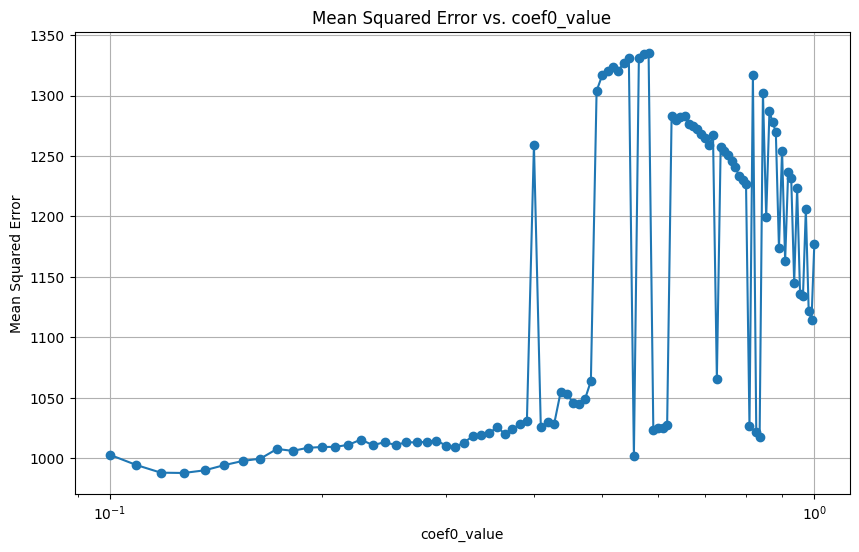

In [ ]:
# coef0 (свободный член): Свободный член в функции ядра, который влияет на взаимодействие между константой и коэффициентом ядра.

coef0_values = np.linspace(0.1, 1.0, 100)

mse_values = []

for coef0_value in coef0_values:
    svr_model_rbf = SVR(kernel='sigmoid', C=1.0, coef0=coef0_value)
    svr_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_model_rbf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rbf)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(coef0_values, mse_values, marker='o')
plt.xscale('log')
plt.title('Mean Squared Error vs. coef0_value')
plt.xlabel('coef0_value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()